https://stats.stackexchange.com/questions/385775/normalizing-vs-scaling-before-pca

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize
import matplotlib.pyplot as plt
plt.ion()

# For reproducibility 
np.random.seed(123)

We're going to generate data that are standard normal/uncorrelated in 4 dimensions, but with one additional variable that takes value either 0 or 5 randomly, giving a 5 dimensional dataset that we wish to visualize:

In [2]:
N = 200
P = 5
rho = 0.5

X = np.random.normal(size=[N,P])
X = np.append(X, 3*np.random.choice(2, size = [N,1]), axis = 1)

We will first do PCA without any preprocessing:

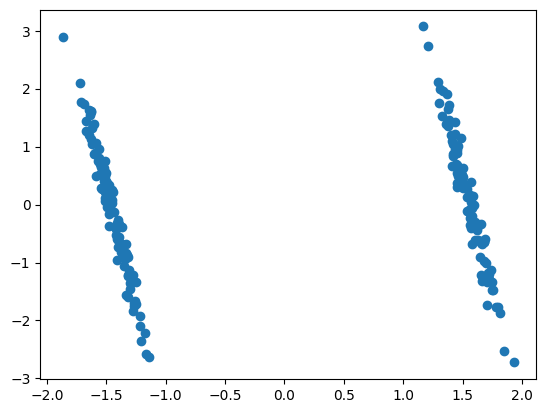

In [3]:
# No preprocessing:
pca = PCA(2)
low_d = pca.fit_transform(X)
plt.scatter(low_d[:,0], low_d[:,1])

We clearly see two clusters, but the data were generated completely at random with no structure at all!

Normalizing changes the plot, but we still see 2 clusters:

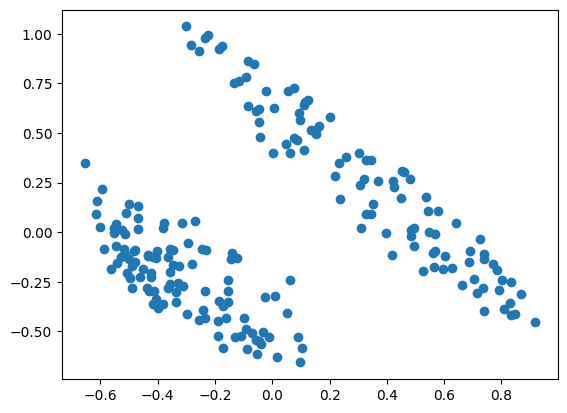

In [4]:
# normalize
Xn = normalize(X)
pca = PCA(2)
low_d = pca.fit_transform(Xn)
plt.scatter(low_d[:,0], low_d[:,1])

The fact that the binary variable was on a different scale from the others has created a clustering effect where one might not necessarily exist. This is because the SVD considers it more than other variables as it contributes more to squared error. This may be solved by scaling the dataset:

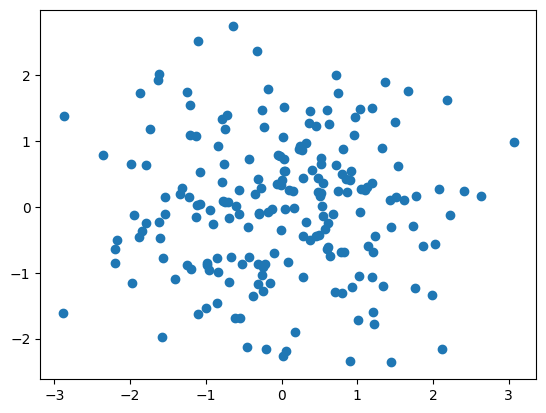

In [5]:
# Scale
Xs = scale(X)
low_d = pca.fit_transform(Xs)
plt.scatter(low_d[:,0], low_d[:,1])

We finally see (correctly) that the data are completely random noise.

I'd like to point out sklearn normalize and scale use different default axes. normalize defaults to axis=1 whereas scale defaults to axis=0. Following @John Madden great example, but if we do normalization along axis=0, the two clusters will also disappear.

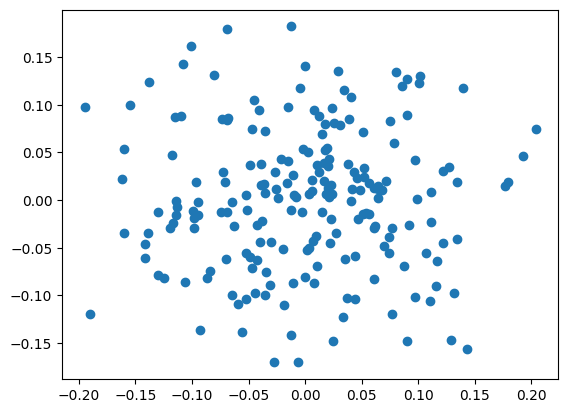

In [6]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize
import matplotlib.pyplot as plt

# For reproducibility 
np.random.seed(123)

N = 200
P = 5
rho = 0.5

X = np.random.normal(size=[N,P])
X = np.append(X, 3*np.random.choice(2, size = [N,1]), axis = 1)

X = normalize(X, axis=0)

# No preprocessing:
pca = PCA(2)
low_d = pca.fit_transform(X)
plt.scatter(low_d[:,0], low_d[:,1])
plt.show()